In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
#Reading dataset
df=pd.read_csv("./employee-attrition.csv")

In [3]:
#Displaying first 5 observations
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Number of observations and features
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
#Number of features
df.columns.shape[0]

35

In [7]:
#Checking dtype of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
#Checking for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
#Statistical measures
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


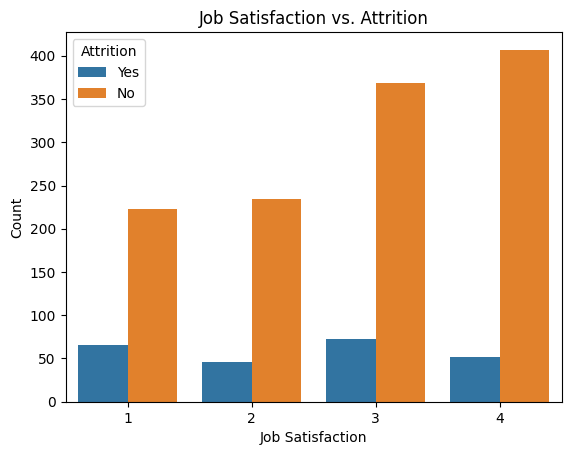

In [11]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Job Satisfaction vs. Attrition')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

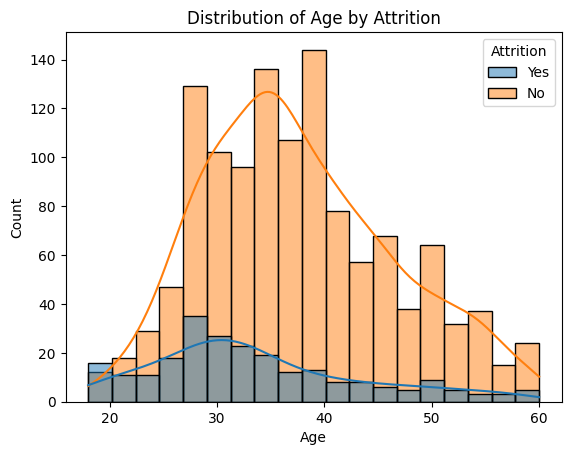

In [12]:
sns.histplot(data=df, x='Age', hue='Attrition', kde=True)
plt.title('Distribution of Age by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

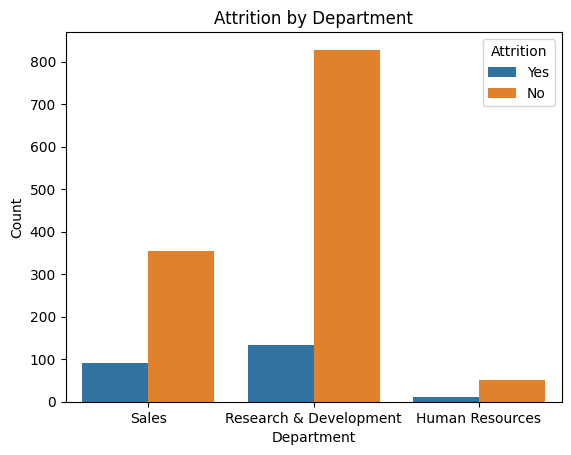

In [13]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

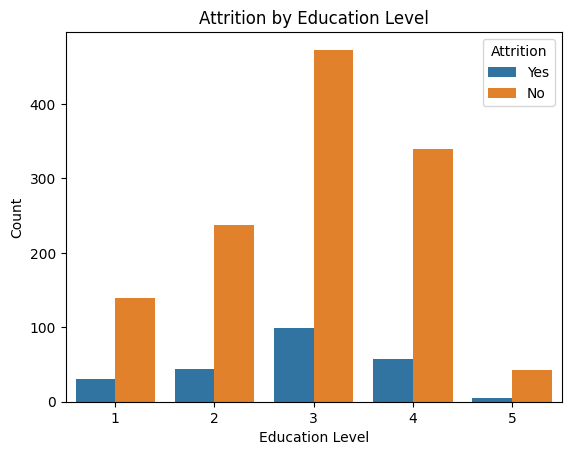

In [14]:
sns.countplot(x='Education', hue='Attrition', data=df)
plt.title('Attrition by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

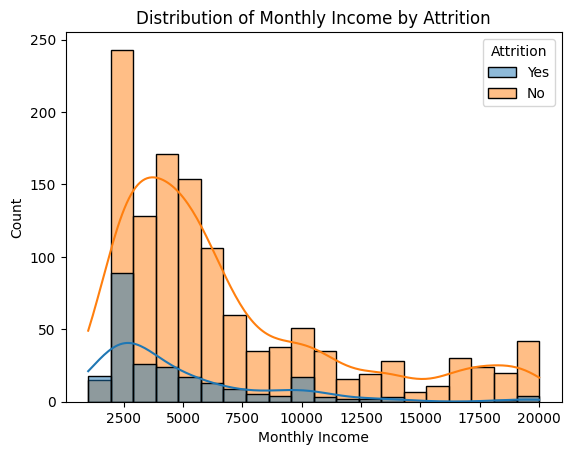

In [15]:
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True)
plt.title('Distribution of Monthly Income by Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

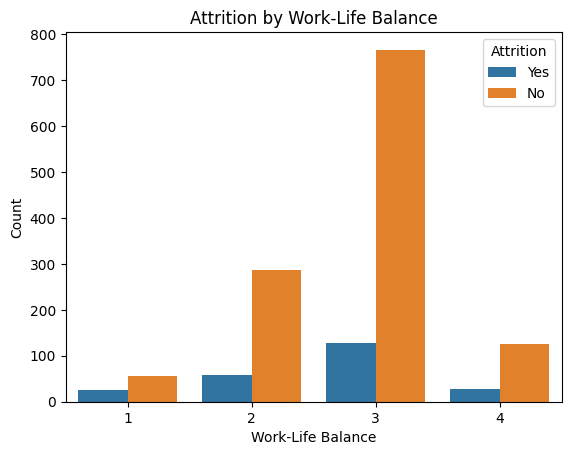

In [16]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title('Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.show()



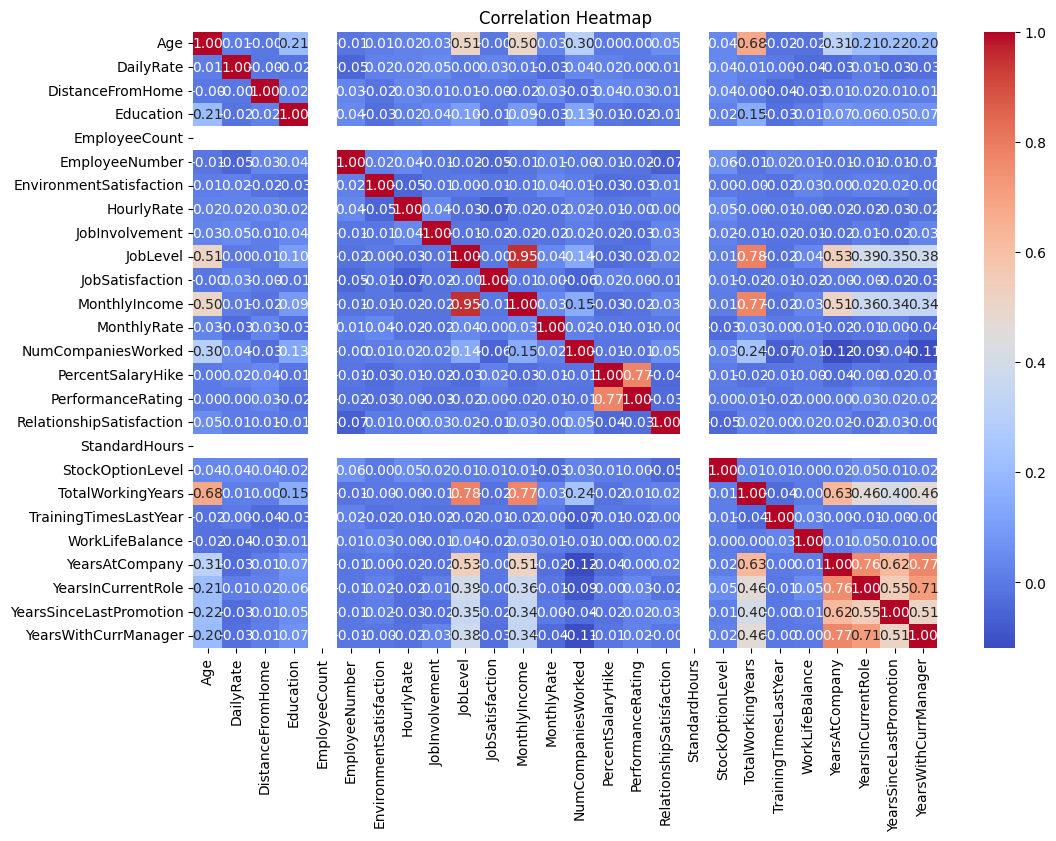

In [17]:
# Correlation Heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

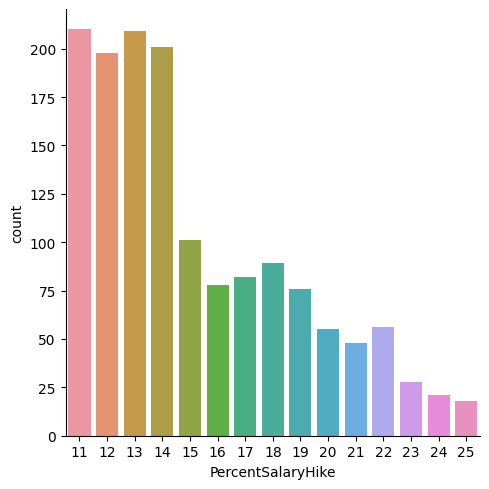

In [18]:
sns.catplot(x='PercentSalaryHike',data=df,kind='count')

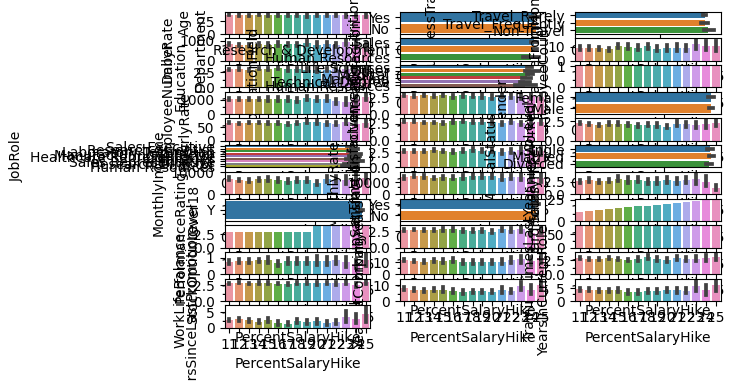

In [19]:
for i in df.columns[:-1]:
    plt.subplot(14, 3, df.columns.get_loc(i) + 1)
    sns.barplot(x='PercentSalaryHike', y=i, data=df)

plt.show()

<Axes: >

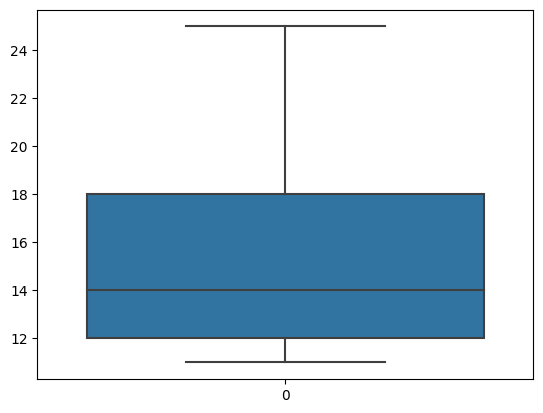

In [20]:
sns.boxplot(df.PercentSalaryHike)

<ipython-input-21-60fc9fe4baad>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,square=True,cmap='cividis',fmt='.1f')


<Axes: >

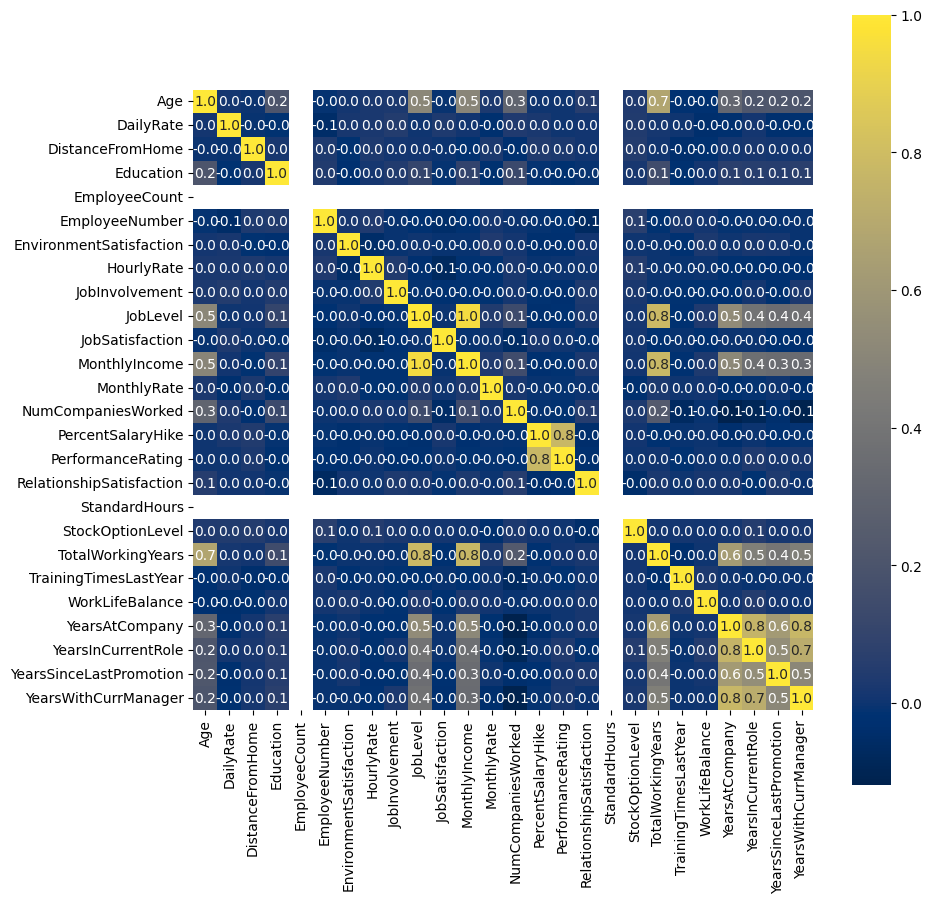

In [21]:
#Correlation
rcParams['figure.figsize']=10,10
sns.heatmap(df.corr(),annot=True,square=True,cmap='cividis',fmt='.1f')

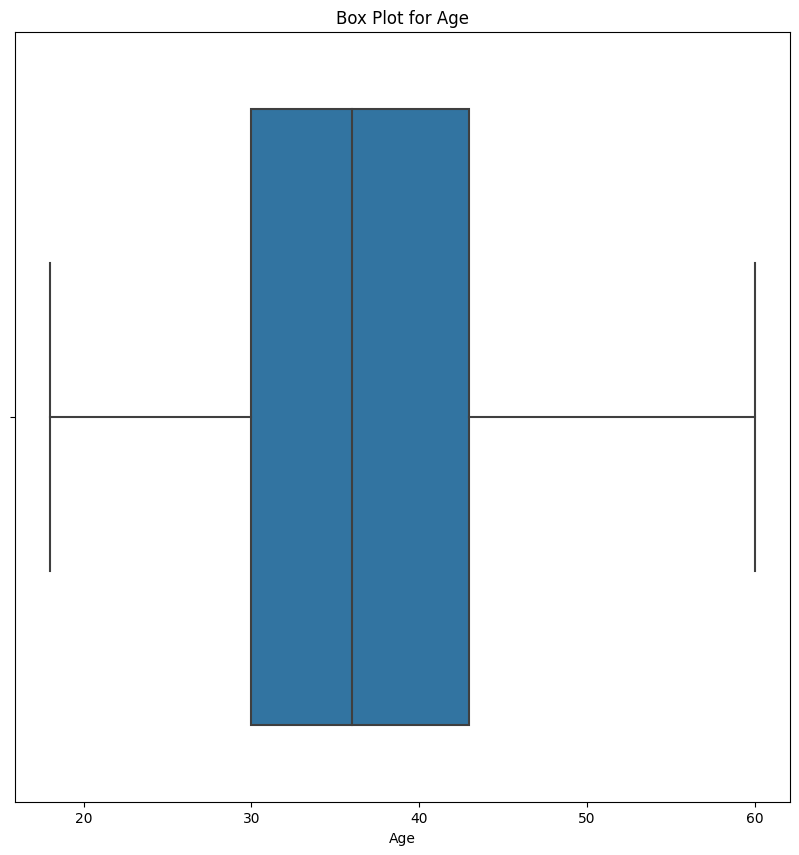

In [22]:
# Box plot for Age
sns.boxplot(x='Age', data=df)
plt.title('Box Plot for Age')
plt.show()

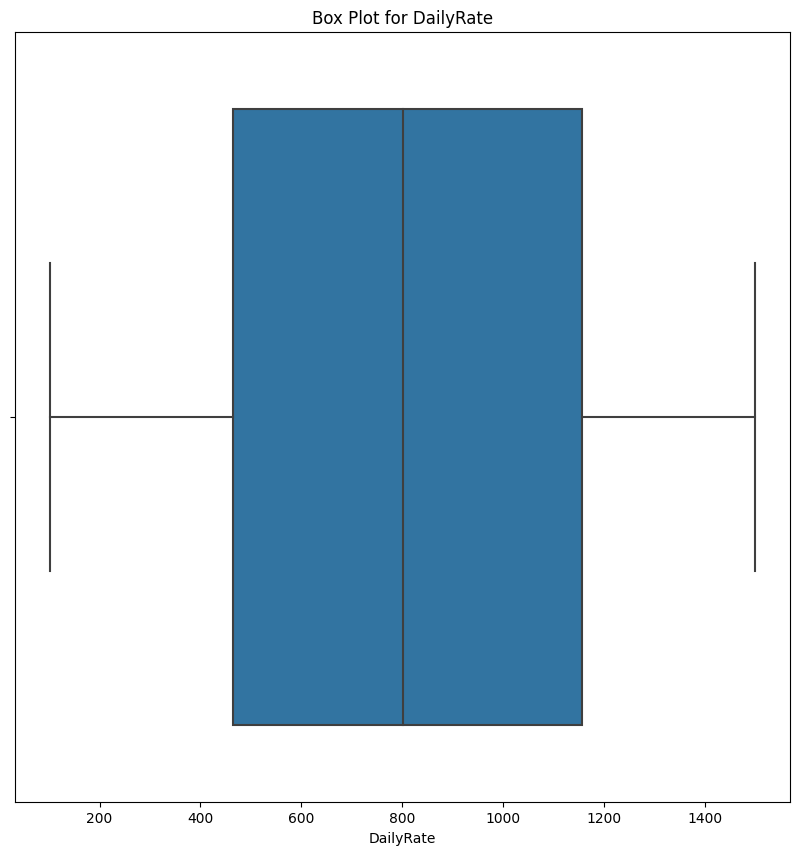

In [23]:
# Box plot for DailyRate
sns.boxplot(x='DailyRate', data=df)
plt.title('Box Plot for DailyRate')
plt.show()

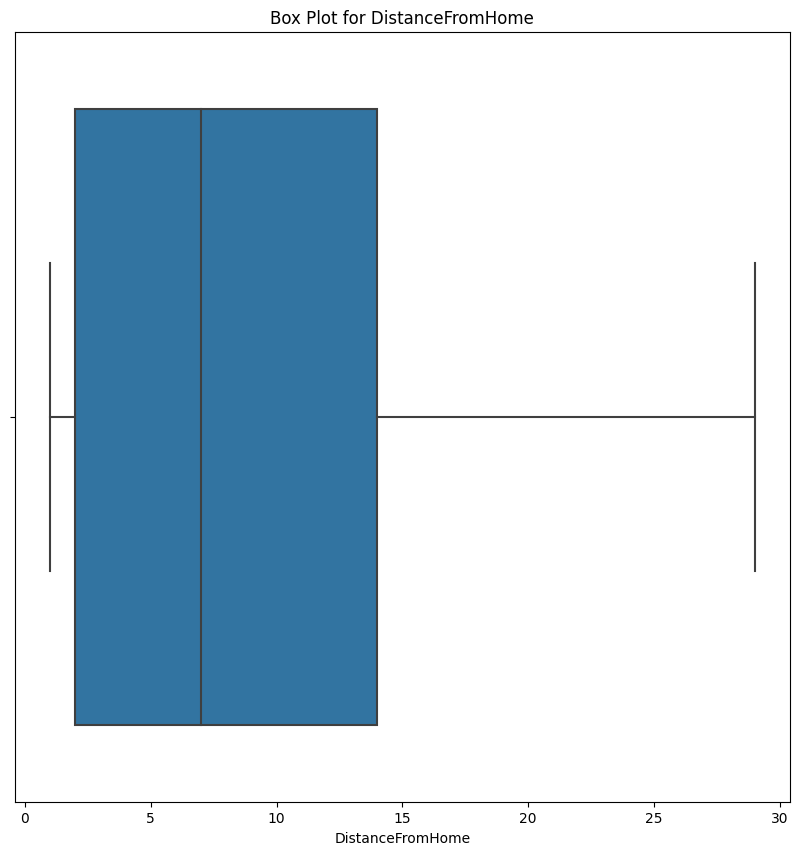

In [24]:
# Box plot for DistanceFromHome
sns.boxplot(x='DistanceFromHome', data=df)
plt.title('Box Plot for DistanceFromHome')
plt.show()

In [25]:
# Define the target variable (dependent variable)
y = df['Attrition']

# Define the independent variables (features)
X = df.drop('Attrition', axis=1)

In [26]:
# Perform one-hot encoding on categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

In [27]:
X_encoded

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,0,0,1,0,1,0,0


In [28]:
#Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=1)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib  # For model saving

In [30]:
# Initialize the models
logistic_model = LogisticRegression(random_state=42)

In [31]:
logistic_model.fit(x_train, y_train)
logistic_predictions = logistic_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# Evaluation of Logistic Regression model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_report = classification_report(y_test, logistic_predictions)

print("Logistic Regression Model Accuracy:", logistic_accuracy)
print("Logistic Regression Model Classification Report:")
print(logistic_report)

Logistic Regression Model Accuracy: 0.8027210884353742
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

          No       0.80      1.00      0.89       236
         Yes       0.50      0.02      0.03        58

    accuracy                           0.80       294
   macro avg       0.65      0.51      0.46       294
weighted avg       0.74      0.80      0.72       294



In [33]:
from sklearn.metrics import accuracy_score

In [34]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=8,splitter='best')
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [35]:
print("Decision Tree :")
ytrainpred=model1.predict(x_train)
ytestpred=model1.predict(x_test)
print("Training accuracy is :{}".format(accuracy_score(y_train,ytrainpred)))
print("Testing accuracy is :{}".format(accuracy_score(y_test,ytestpred)))

Decision Tree :
Training accuracy is :0.9625850340136054
Testing accuracy is :0.8027210884353742


In [36]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier(n_estimators=250,criterion='entropy')
model2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [39]:
# Training and testing the Decision Tree model
model2.fit(x_train, y_train)
decision_tree_predictions = model2.predict(x_test)

In [40]:
print("Decision Tree :")
ytrainpred=model2.predict(x_train)
ytestpred=model2.predict(x_test)
print("Training accuracy is :{}".format(accuracy_score(y_train,ytrainpred)))
print("Testing accuracy is :{}".format(accuracy_score(y_test,ytestpred)))

Decision Tree :
Training accuracy is :1.0
Testing accuracy is :0.8197278911564626


In [41]:
# Evaluation of Decision Tree model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_report = classification_report(y_test, decision_tree_predictions)

print("Decision Tree Model Accuracy:", decision_tree_accuracy)
print("Decision Tree Model Classification Report:")
print(decision_tree_report)

Decision Tree Model Accuracy: 0.8197278911564626
Decision Tree Model Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.99      0.90       236
         Yes       0.73      0.14      0.23        58

    accuracy                           0.82       294
   macro avg       0.78      0.56      0.56       294
weighted avg       0.80      0.82      0.77       294



## Testing with random values

In [ ]:
rand_data = [7.9, .30, 0.45, 3.7, 0.078, 15, 37, 0.99731, 3.351, 0.86, 12.8, 10.9, 11.9, 12.9, 13.0, 13.9, 14.9, 15.9, 16.9, 18.9, 30.9, 59.0, 12.9, 56.9, 15.9, 19.9, 14.9, 10.9, 10.0, 14.9, 10.0, 12.3, 19.2, 10.9, 11.9, 10.8, 18.8, 10.1, 100.0, 21.9, 31.1, 41.1, 51.9, 91.0, 11.2, 21.9, 22.8]

In [ ]:
prediction = model1.predict([rand_data])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [ ]:
prediction = model2.predict([rand_data])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)